In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
cd drive

/content/drive


In [ ]:
ls

MyDrive/


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
ls

 best_model.h5                    'NPTEL MOOC form (Responses).gsheet'
 best_model.keras                 'Screen Shot 2024-06-07 at 8.56.30 PM.png'
'Cliswift(Responses).gsheet'       taxi_trip_pricing.csv
'Colab Notebooks'/                'Untitled form (1).gform'
'Farewell AV'/                    'Untitled form.gform'
'Get in touch.gform'              'Untitled form (Responses).gsheet'
'HOSPITALITY (Responses).gsheet'   website/
 LOGISTICS.gsheet                 'Wsma experiment'/


In [ ]:
df=pd.read_csv('taxi_trip_pricing.csv')

In [ ]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


# Check data what we have been given

In [ ]:
df.shape

(1000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
df.dtypes

,0
Trip_Distance_km,float64
Time_of_Day,object
Day_of_Week,object
Passenger_Count,float64
Traffic_Conditions,object
Weather,object
Base_Fare,float64
Per_Km_Rate,float64
Per_Minute_Rate,float64
Trip_Duration_Minutes,float64


# Preprocessing

1. Check for null (Data cleaning)
2. Convert categorical to numbers (Feature encoding)
3. Normalize values minmaxscaler (Feature scaling)
4. Correlational Analysis (Feature selection)

## 1.Check for null
- fill null values with mean median or mode
- mode is likely used for categorical variables

In [ ]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [ ]:
# we will fill numerical null with mean and categorical null with mode
#filter num cols and cat cols

num_cols=df.select_dtypes(include=['float64','int64']).columns
cat_cols=df.select_dtypes(include=['object','category']).columns

In [ ]:
#filling na

for col in num_cols:
  df[col].fillna(df[col].mean(),inplace=True)

for col in cat_cols:
  df[col].fillna(df[col].mode()[0],inplace=True)

/tmp/ipython-input-283424385.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
/tmp/ipython-input-283424385.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
#check null
df.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


# 2.Feature encoding and 3.Feature scaling

1.   converting cat to nums (using one hot encoder)
2.   normalizing values (0 to 1)




In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
num_cols=num_cols.tolist()
num_cols.remove('Trip_Price')
cat_cols=cat_cols.tolist()

In [ ]:
ct=make_column_transformer(
    (MinMaxScaler(),num_cols),
    (OneHotEncoder(),cat_cols)
)

In [ ]:
#create x = features
# y = labels

x=df.drop('Trip_Price',axis=1)
y=df['Trip_Price']

In [ ]:
#split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Trip_Distance_km', 'Passenger_Count',
                                  'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate',
                                  'Trip_Duration_Minutes']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Time_of_Day', 'Day_of_Week',
                                  'Traffic_Conditions', 'Weather'])])

In [ ]:
x_train.shape,x_test.shape

((800, 10), (200, 10))

In [ ]:
x_train_tran=ct.transform(x_train)
x_test_tran=ct.transform(x_test)


# Creating NEURAL NETWORK
1. Create model
2. Compile model
3. fit model

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history=model.fit(x_train_tran,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 55.4008 - mae: 55.4008
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.4186 - mae: 33.4186
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.0396 - mae: 22.0396
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.6238 - mae: 19.6238
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.1312 - mae: 19.1312
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.0210 - mae: 18.0210
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.2306 - mae: 17.2306
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.1131 - mae: 17.1131
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.9058 - mae: 14.9058
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.3304 - mae: 12.3304
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8325 - mae: 10.8325
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0915 - mae: 9.0915
Epoch 13/100
25

In [ ]:
model.evaluate(x_test_tran,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 4.3516 - mae: 4.3516


[4.777585983276367, 4.777585983276367]

Text(0.5, 0, 'epochs')

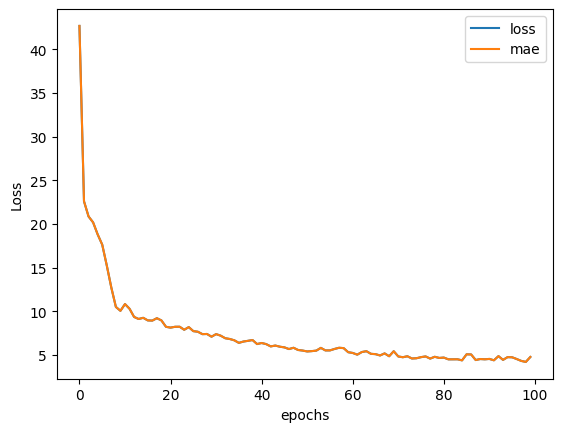

In [ ]:
#plot loss curv

pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('epochs')

In [ ]:
print(y_test.shape)
print(y_pred.shape)


(200,)
(200, 100)


In [ ]:
y_pred=model.predict(x_test_tran).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
def plot_predictions(x_train, y_train, x_test, y_test, y_pred, feature_index=0, feature_name=None):
    """
    Plots training, testing, and predicted values for regression visually using one selected feature.
    feature_index: index of feature column to use on x-axis (default=0)
    feature_name: optional label for that feature
    """
    x_train_feat = np.array(x_train)[:, feature_index]
    x_test_feat = np.array(x_test)[:, feature_index]

    plt.figure(figsize=(10,6))

    # Training data (blue)
    plt.scatter(x_train_feat, y_train, color='blue', alpha=0.6, label='Training Data')

    # Testing data (green)
    plt.scatter(x_test_feat, y_test, color='green', alpha=0.6, label='Testing Data')

    # Predictions (red)
    plt.scatter(x_test_feat, y_pred, color='red', alpha=0.6, label='Predicted')

    plt.xlabel(feature_name if feature_name else f'Feature {feature_index}')
    plt.ylabel('Trip Price')
    plt.title('Training, Testing, and Predicted Comparison')
    plt.legend()
    plt.show()

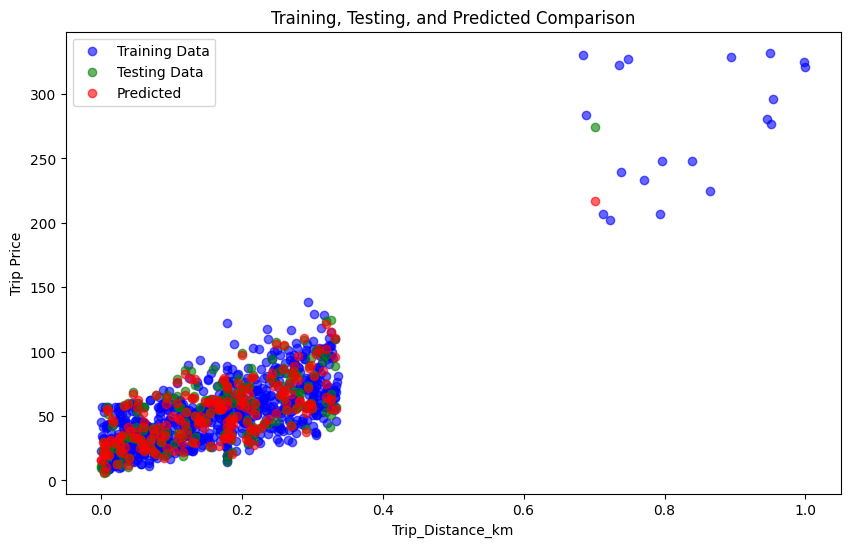

In [ ]:
plot_predictions(x_train_tran, y_train, x_test_tran, y_test, y_pred, feature_index=0, feature_name='Trip_Distance_km')


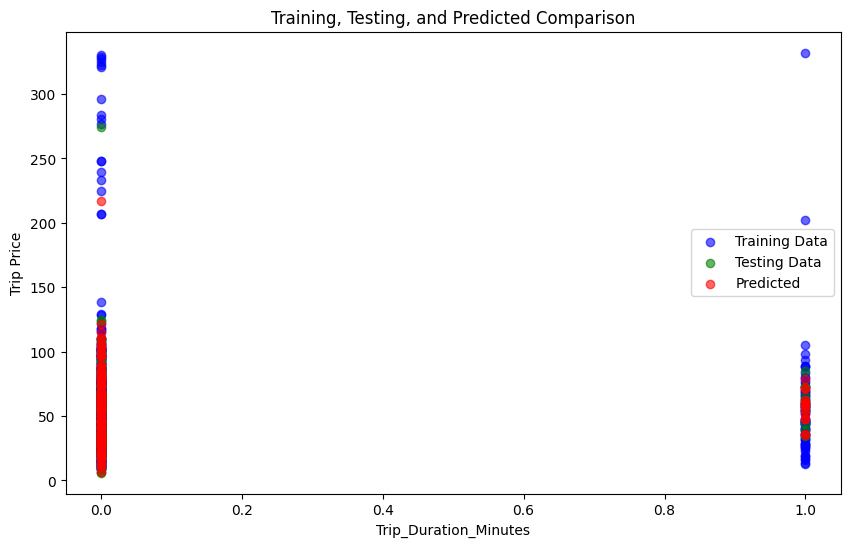

In [ ]:
plot_predictions(x_train_tran, y_train, x_test_tran, y_test, y_pred, feature_index=9, feature_name='Trip_Duration_Minutes')
